# Optimisation discrète et optimisation multi-objectif

Pour trouver les solutions optimales pour quelques problèmes exposés ici, nous devons installer le solver "CPLEX" :

In [1]:
!pip install cplex

In [2]:
from scipy.spatial import distance
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

In [3]:
mpl.rcParams['figure.figsize'] = (12, 6)

In [4]:
def plot_assignments(X,Boites,Objets):
    N=Boites.shape[0]
    plt.scatter(Boites[:,0],Boites[:,1], c="b", marker='s', s=50, label="Boites")
    plt.scatter(Objets[:,0],Objets[:,1], c="r", marker='o', label="Objets")
    for i, txt in enumerate(list(range(1,N+1))):
        plt.annotate(txt,(Objets[:,0][i]+0.02,Objets[:,1][i]+0.02))
    for idx,assin_optim in enumerate(X.argmax(axis=1)):
        plt.plot([Objets[assin_optim][0],Boites[idx][0]],[Objets[assin_optim][1],Boites[idx][1]], "r", linestyle='--')
    plt.legend()
    plt.show()

## Rangement d'objets (Optimisation combinatoire)

On souhaite ranger N objets éparpillés sur le sol dans N boîtes alignées sur le sol.

Les boîtes sont alignées selon l’axe des x et sont ordonnées de gauche à droite (si i < i′,
la boîte i est à gauche de la boîte i′). La boîte i est centrée sur un point $B_i$ du plan (x, y).
De même l’objet n°j est repéré par le point $O_j$ du plan (x, y).

Les objets doivent être rangés de manière à :
- N’avoir qu’un seul objet par boîte,
- Ce que tous les objets soient rangés,
- Minimiser la distance totale de déplacement. Elle se calcule en sommant les distances nécessaires pour ranger chaque objet. On considère que pour ranger l’objet n°j dans la boîte n°i, la distance nécessaire est $\lVert O_j − B_i \rVert$ (distance euclidienne).

In [5]:
Boites=np.genfromtxt("data/RangerObjets/PositionCasiers.txt",skip_header=1)
Objets=np.genfromtxt("data/RangerObjets/PositionObjets.txt",skip_header=1)

N=Boites.shape[0]

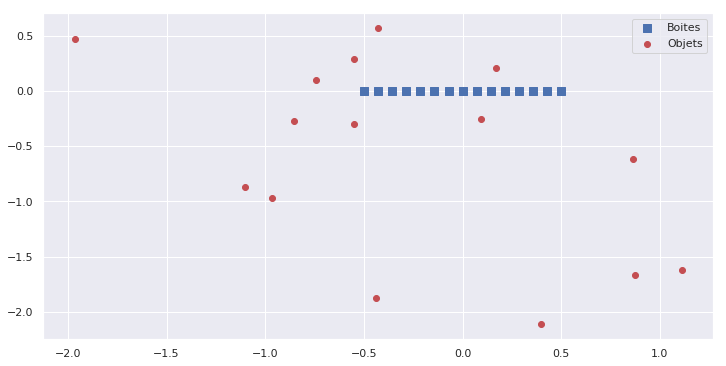

In [6]:
plt.scatter(Boites[:,0],Boites[:,1], c="b", marker='s', s=50, label="Boites")
plt.scatter(Objets[:,0],Objets[:,1], c="r", marker='o', label="Objets")
plt.legend()
plt.show()

On représente une solution du problème par un vecteur à valeurs binaires : soit $x \in R^{n^2x1}$ tel que $x_{i,j} = 1$ si l’objet j est dans la boîte i, 0 sinon. L’objectif de l’exercice est de
formuler le problème d’optimisation à résoudre comme un problème de programmation
linéaire en nombres entiers, puis de le résoudre.

### Formulation du problème

1) Traduction mathématique : La boîte i contient un objet et un seul et que l'objet j se trouve dans une boîte et une seule

$$\sum_{i=1}^{N}x_{i,j}=1 \quad et \quad \sum_{j=1}^{N}x_{i,j}=1$$

2) Formulation du problème de programation linéaire en nombres entiers

$$ min \sum_{i,j=1}^{N}x_{i,j} \lVert O_j − B_i \rVert$$
$$\forall i, j \in \{1,..,N\} \quad x_{i,j} \in \{0,1\}$$
$$\sum_{i=1}^{N}x_{i,j}=1$$
$$\sum_{j=1}^{N}x_{i,j}=1$$

### Résolution du problème

##### Question 2)

Optimization status : optimal
Cost optimized value : 15.377627809988198
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


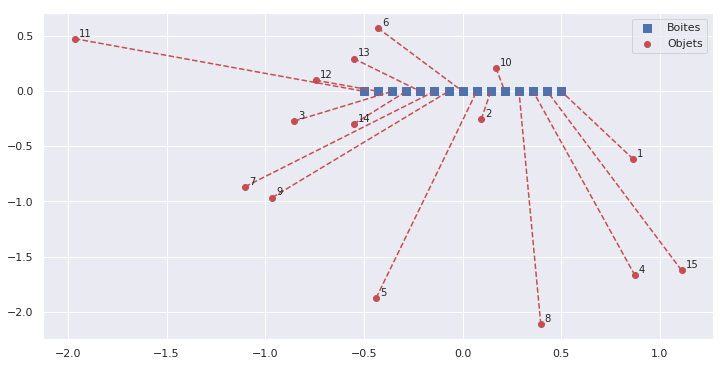

In [7]:
# The data for the assignment problem
Distances=distance.cdist(Boites,Objets).flatten()

# The variable we are solving for
Assignments = cvx.Variable(N*N, boolean=True)

# One object for one box
constraints=[]
for i in range(N):
    constraints += [cvx.sum(Assignments[N*i:N*(i+1)]) == 1]
    constraints += [cvx.sum(Assignments[[j*N+i for j in range(N)]]) == 1]

# Defining the cost and the objective function
Cost = cvx.sum(Assignments * Distances)
obj = cvx.Minimize(Cost)

# We tell cvxpy that we want to minimize cost under the constraints
Assignment_problem = cvx.Problem(obj, constraints)

# Solving the problem
Assignment_problem.solve()

X=np.abs(Assignments.value.reshape(N,N))

print("Optimization status :",Assignment_problem.status)
print("Cost optimized value :",Assignment_problem.value)
print(np.round(X))
plot_assignments(X,Boites,Objets)

##### Question 3)

Nouvelle contrainte : l'objet n°1 doit se situer dans la boîte située juste à gauche de la boîte contenant l'objet n°2, c'est à dire :

$$\forall i \quad x_{i,1} = x_{i+1,2}$$

Optimization status : optimal
Cost optimized value : 15.565123298125487
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


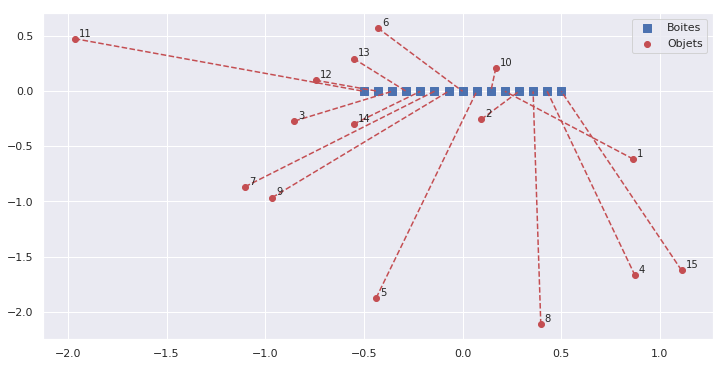

In [8]:
# The data for the assignment problem
Distances=distance.cdist(Boites,Objets).flatten()

# The variable we are solving for
Assignments = cvx.Variable(N*N, boolean=True)

# One object for one box
constraints=[]
for i in range(N):
    constraints += [cvx.sum(Assignments[N*i:N*(i+1)]) == 1]
    constraints += [cvx.sum(Assignments[[j*N+i for j in range(N)]]) == 1]
for i in range(N-1):
    constraints +=[Assignments[i*N] - Assignments[(i+1)*N+1] == 0]

# Defining the cost and objective function
Cost = cvx.sum(Assignments * Distances)
obj = cvx.Minimize(Cost)

# We tell cvxpy that we want to minimize cost under the constraints
Assignment_problem = cvx.Problem(obj, constraints)

# Solving the problem
Assignment_problem.solve()

X=np.abs(Assignments.value.reshape(N,N))

print("Optimization status :",Assignment_problem.status)
print("Cost optimized value :",Assignment_problem.value)
print(np.round(X))
plot_assignments(X,Boites,Objets)

##### Question 4)

Nouvelle contrainte : La boîte contenant l'objet n°3 se situe à droite de la boîte contenant l'objet n°4 (sans être forcément à côté)

Cette contrainte se traduit par :
$$x_{i,3} + x_{i+k,4} \le 1 \quad \forall i,k \gt 0$$
En effet, comme les variables $x_{i,j}$ sont binaires, la contrainte d'inégalité imposent que les deux variables ne peuvent être toutes les deux égales à 1. En d'autre terme, si $x_{i,3} = 1$, c'est à dire que l'objet 3 est dans la boîte i alors $x_{i+k,4} = 0$, c'est à dire que l'objet 4 n'est pas dans les boîte $i+k$ pour tout $k>0$.

Autrement dit, l'objet 4 n'est pas dans les boîtes (i+1, i+2 etc..), c'est à dire qu'il ne peut pas être à droite de l'objet 3.

Optimization status : optimal
Cost optimized value : 15.901379430360375
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


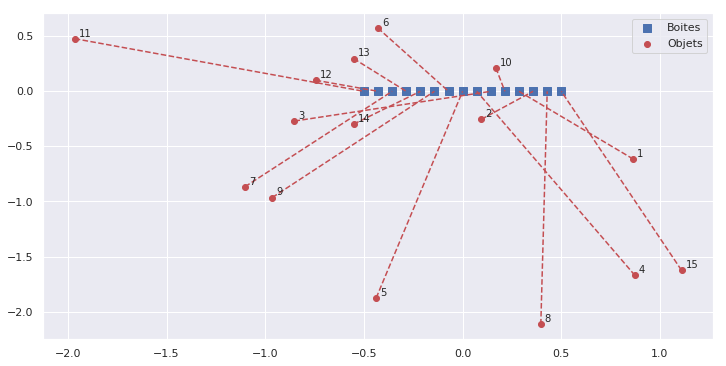

In [9]:
# The data for the assignment problem
Distances=distance.cdist(Boites,Objets).flatten()

# The variable we are solving for
Assignments = cvx.Variable(N*N, boolean=True)

# Defining the constraints for the problem
constraints=[]
for i in range(N):
    constraints += [cvx.sum(Assignments[N*i:N*(i+1)]) == 1]
    constraints += [cvx.sum(Assignments[[j*N+i for j in range(N)]]) == 1]

for i in range(N-1):
    constraints +=[Assignments[i*N] - Assignments[(i+1)*N+1] == 0]
    
for i in range(N):
    for k in range(1,N-i):
        constraints += [Assignments[i*N+2] + Assignments[(i+k)*N+3] <= 1]

# Defining the cost and objective function
Cost = cvx.sum(Assignments * Distances)
obj = cvx.Minimize(Cost)

# We tell cvxpy that we want to minimize cost under the constraints
Assignment_problem = cvx.Problem(obj, constraints)

# Solving the problem
Assignment_problem.solve()

X=np.abs(Assignments.value.reshape(N,N))

print("Optimization status :",Assignment_problem.status)
print("Cost optimized value :",Assignment_problem.value)
print(np.round(X))
plot_assignments(X,Boites,Objets)

##### Question 5)

Nouvelle contrainte : La boîte contenant l'objet n°7 se situe à côté l'objet n°9

Cette contrainte se traduit par :
$$x_{i,7} + x_{i+k,9} \le 1 \quad \forall i\gt 0,\forall k \gt 2$$
$$x_{i,7} + x_{i-k,9} \le 1 \quad \forall i\gt 0,\forall k \gt 2$$

En effet, comme les variables $x_{i,j}$ sont binaires, les contraintes d'inégalités imposent que les deux variables ne peuvent être toutes les deux égales à 1. En d'autre terme, pour la première égalité, si $x_{i,7} = 1$, c'est à dire que l'objet 7 est dans la boîte i alors $x_{i+k,9} = 0$, c'est à dire que l'objet 9 n'est pas dans les boîte $i+k$ pour tout $k>2$, autrement dit, l'objet 9 n'est pas dans les boîtes (i+2, i+3 etc..), et ne peut donc être que dans la boîte directement à droite de la boîte où se trouve l'objet 7, ou dans les boîtes qui se trouvent à sa gauche.

La deuxième inégalité impose de la même façon, que l'objet 9 ne peut être que dans la boîte directement à gauche de la boîte où se trouve l'objet 7.

Les deux inégalités combinées imposent que l'objet 9 et 7 doivent être à côté.

Optimization status : optimal
Cost optimized value : 15.904808342529503
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


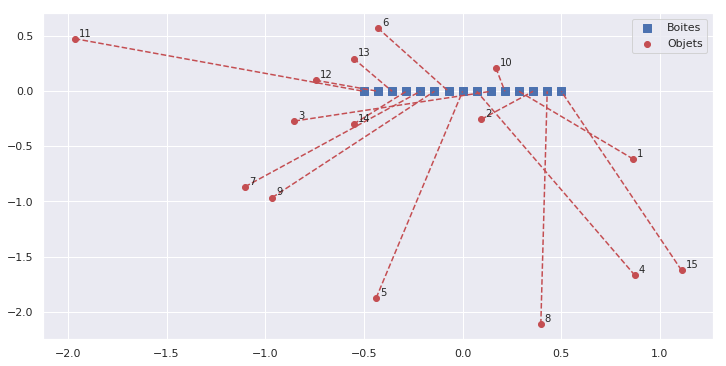

In [10]:
# The data for the assignment problem
Distances=distance.cdist(Boites,Objets).flatten()

# The variable we are solving for
Assignments = cvx.Variable(N*N, boolean=True)

# Defining the constraints for the problem
constraints=[]
for i in range(N):
    constraints += [cvx.sum(Assignments[N*i:N*(i+1)]) == 1]
    constraints += [cvx.sum(Assignments[[j*N+i for j in range(N)]]) == 1]

for i in range(N-1):
    constraints +=[Assignments[i*N] - Assignments[(i+1)*N+1] == 0]

for i in range(N):
    for k in range(1,N-i):
        constraints += [Assignments[i*N+2] + Assignments[(i+k)*N+3] <= 1]
    for l in range(2,N-i):
        constraints += [Assignments[i*N+6] + Assignments[(i+l)*N+8] <= 1]
    for p in range(2,i+1):
        constraints += [Assignments[i*N+6] + Assignments[(i-p)*N+8] <= 1]

# Defining the cost and objective function
Cost = cvx.sum(Assignments * Distances)
obj = cvx.Minimize(Cost)

# We tell cvxpy that we want to minimize cost under the constraints
Assignment_problem = cvx.Problem(obj, constraints)

# Solving the problem
Assignment_problem.solve()

X=np.abs(Assignments.value.reshape(N,N))

print("Optimization status :",Assignment_problem.status)
print("Cost optimized value :",Assignment_problem.value)
print(np.round(X))
plot_assignments(X,Boites,Objets)

##### Question 6) : Unicité de la solution ?

En rajoutant dans les contraintes que la solution du problème doit être différente de la solution précédente, on peut vérifier l'unicité de la solution, cependant il faut modéliser cette contrainte de différence comme une contrainte linéaire. On peut faire ceci en résolvant à chaque fois le problème initial avec en plus la contrainte $x_{i,j}=1-x^*_{i,j}$ pour un $(i, j)$ où $x^*$ est notre solution, on a donc $n^2$ problèmes linéaires à résoudre, et à chaque fois on vérifie si la nouvelle solution (différente de $x^*$) détériore la fonction coût, si ce n'est pas le cas, alors $x^*$ n'est pas l'optimum global du problème.
 
On remarque que les objets 13 et 14 sont symétriques par rapport à l'axe des abcisses, c'est à dire symétriques par rapport à l'axe qui contient toutes les boîtes. Il suffit alors d'intervertir leur boîtes respectives dans la dernière solution du problème pour ne pas changer la distance totale qu'on veut minimser, et donc pour avoir la même solution.

Ceci prouve que la solution n'est pas unique.

Nous allons appliquer la méthode expliquée plus haut, en rajoutant la contrainte sur la solution :

In [11]:
Prev_Sol=Assignments.value
Prev_Cost=Assignment_problem.value

Optimization status : optimal
Cost optimized value : 15.904808342529503
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


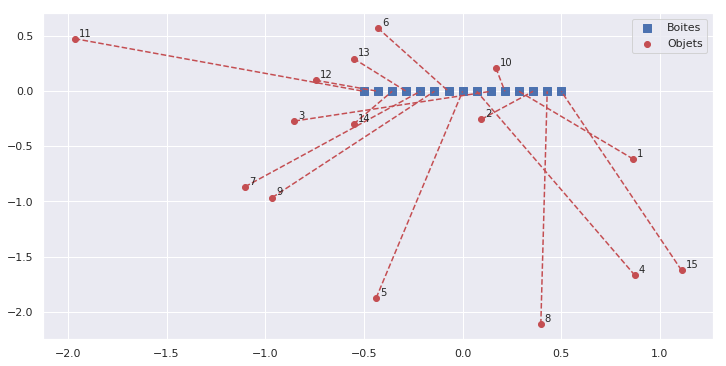

In [12]:
# The data for the assignment problem
Distances=distance.cdist(Boites,Objets).flatten()

for k in range(N*N):
    # The variable we are solving for
    Assignments = cvx.Variable(N*N, boolean=True)

    # Defining the constraints for the problem
    constraints=[]
    constraints += [1-Prev_Sol[k] == Assignments[k]]
    for i in range(N):
        constraints += [cvx.sum(Assignments[N*i:N*(i+1)]) == 1]
        constraints += [cvx.sum(Assignments[[j*N+i for j in range(N)]]) == 1]

    for i in range(N-1):
        constraints +=[Assignments[i*N] - Assignments[(i+1)*N+1] == 0]

    for i in range(N):
        for k in range(1,N-i):
            constraints += [Assignments[i*N+2] + Assignments[(i+k)*N+3] <= 1]
        for l in range(2,N-i):
            constraints += [Assignments[i*N+6] + Assignments[(i+l)*N+8] <= 1]
        for p in range(2,i+1):
            constraints += [Assignments[i*N+6] + Assignments[(i-p)*N+8] <= 1]

    # Defining the cost and objective function
    Cost = cvx.sum(Assignments * Distances)
    obj = cvx.Minimize(Cost)

    # We tell cvxpy that we want to minimize cost under the constraints
    Assignment_problem = cvx.Problem(obj, constraints)

    # Solving the problem
    Assignment_problem.solve()
    
    if Assignment_problem.value==Prev_Cost:
        break
X=np.abs(Assignments.value.reshape(N,N))

print("Optimization status :",Assignment_problem.status)
print("Cost optimized value :",Assignment_problem.value)
print(np.round(X))
plot_assignments(X,Boites,Objets)

Effectivement, la solution retrouvée est celle qui inverse les boîtes assignées pour les objets 13 et 14.

La distance totale dans ce cas est bien égale à celle de la solution précédente d'où la non unicité de la solution :

In [13]:
print(np.sum(Assignments.value.flatten() * Distances))

15.904808342529503


## Communication entre espions (optimisation combinatoire)

##### Question 5)

On représente une solution du problème par un vecteur à valeurs binaires : soit $x \in R^{n^2x1}$ tel que $x_{i,j} = 1$ si le message est transmis de l'agent i à l'agent j, 0 sinon.

Il s'agit de trouver la façon de communiquer le message à tous les agents à partir de l'agent $1$ qui minimise la probabilité totale d'interception lors des différentes transmissions.

### Formulation du problème

On peut voir l'exercice comme un problème d'arbre recouvrant minimal en partant de l'agent n°$1$.

L'idée est donc de trouver le chemin le plus court de l'agent n°$1$ à chacun des autres agents, en prenant comme "coût" la probabilité d'interception. Si un agent $i$ ne peut pas communiquer avec un agent $j$, on met un coût infini.

On utilisera l'algorithme de Dijkstra.

##### Résolution de la première formulation du problème

In [14]:
from scipy.sparse.csgraph import dijkstra
Probas=np.genfromtxt("data/ProbaInterception.txt")
Probas[np.isnan(Probas)] = np.inf
N=Probas.shape[0]
dijkstra(Probas)
Costs, predecessors=dijkstra(Probas, return_predecessors=True, indices=0)
X=np.zeros((N,N))
for i in range(1,N):
    X[predecessors[i],i]=1

##### Résultat

La probabilité d'interception du message est : 0.8389336609


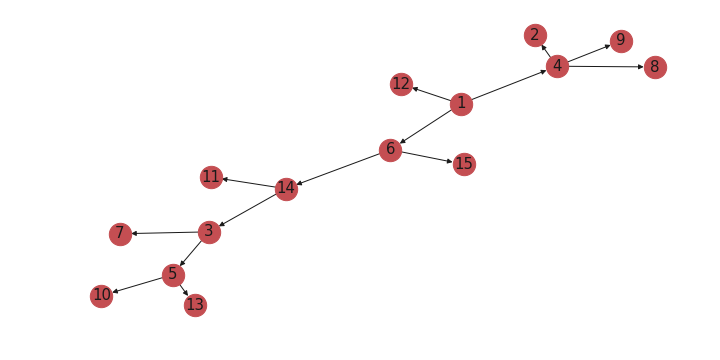

In [15]:
import warnings
import networkx as nx
warnings.filterwarnings('ignore')
G=nx.from_numpy_matrix(X, create_using=nx.MultiDiGraph())
pos = nx.layout.spring_layout(nx.from_numpy_matrix(X))
nx.draw_networkx_labels(G, pos, {i : i + 1 for i in G.nodes()}, font_size=15)
nx.draw(G, pos, node_size=500)
print("La probabilité d'interception du message est :",np.sum(np.nan_to_num(X*Probas)))

## Dimensionnement d'une poutre (optimisation multiobjectif)

On est devant un problème multi-objectif où on souhaite minimiser les deux critères:
\begin{equation}
p(a, b) = a^2 - b^2 \\
d(a, b) = \frac{10^{-3}}{10^{-2} + a^4 - b^4}
\end{equation}
Sous les contraintes:
$
\begin{cases}
0.02 \le a \le 1 \\
0 \le b \le a - 0.01 \\
\end{cases}
$

In [16]:
def p(couple):
    return couple[0]**2 - couple[1]**2

def d(couple):
    return 10**(-3)/(10**(-2) + couple[0]**4 - couple[1]**4)

def generate(N):
    couples = []
    for j in range(N):
        a = np.random.uniform(0.02, 1)
        couples.append((a, np.random.uniform(0, a - 0.01)))
    
    return couples

In [17]:
def pareto(X, Y):
    sorted_list = sorted([[X[i], Y[i]] for i in range(len(X))])
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if pair[1] <= pareto_front[-1][1]:
            pareto_front.append(pair)
            
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    return pf_X, pf_Y

### Stratégie gloutonne

La méthode gloutonne consiste en la génération de N couples réalisables (a, b), on peut alors déduire graphiquement la surface de Pareto (c'est la surface des solutions dominantes, pour une valeur donnée d'un objectif on ne peut plus optimiser l'autre).

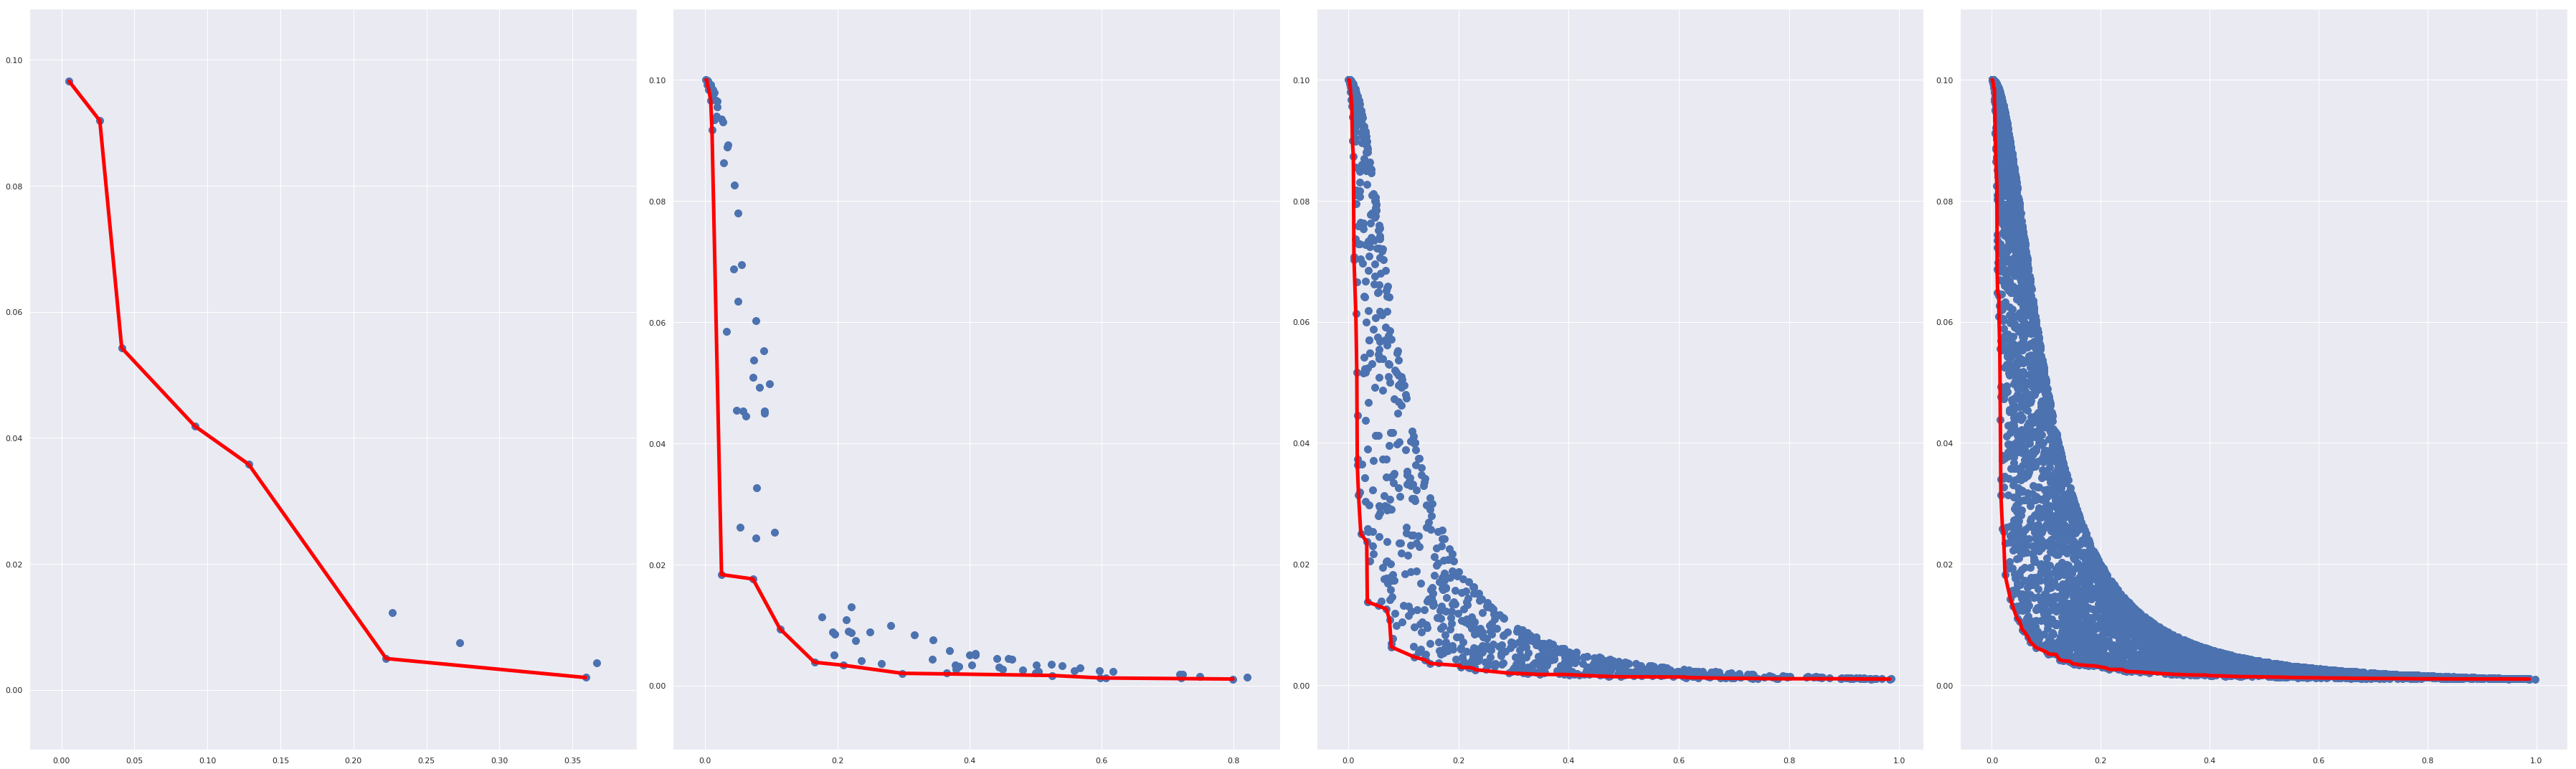

In [18]:
numbers = [10, 100, 1000, 5000]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, len(numbers), figsize = (50, 15))
axes = {10 : ax1, 100 : ax2, 1000 : ax3, 5000 : ax4}
for number in numbers:
    couples = generate(number)
    X, Y = [p(couple) for couple in couples], [d(couple) for couple in couples]
    pf_X, pf_Y = pareto(X, Y)
    axes[number].scatter(X,Y, s=100)
    axes[number].plot(pf_X, pf_Y, c = 'red', linewidth=5)
    
plt.tight_layout()
plt.show()

Plus on a de points, plus on converge vers la surface de Pareto, mais plus on a d'évaluations de la fonction coût. Avec 5000 points (et donc 5000 évaluations de la fonction coût) on obtient une surface de Pareto assez convexe.

### Stratégie avec reformulation mono-objectif

On peut reformuler le problème précédent en un problème mono-objectif à chaque fois en considérant l'optimisation du critère:
\begin{equation}
d(a, b) + \alpha p(a, b)
\end{equation}
pour un $\alpha \ge 0$
La solution obtenue appartient à la surface de Pareto, en faisant tendre $\alpha$ vers 0, on peut reconstruire la surface de Pareto si celle-ci est convexe, chose que la méthode gloutonne a démontrée.

In [19]:
def mono(couple, alpha):
    return d(couple) + alpha*p(couple)

def constraint(couple):
    return np.array([couple[1], couple[0] - couple[1] - 0.01])

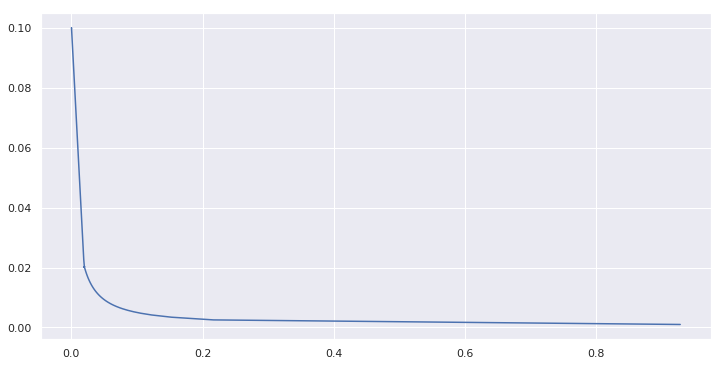

The total number of Cost function evaluations :  960


In [20]:
from scipy.optimize import minimize
alphas = list(np.linspace(0, 1, 100)) + list(np.linspace(1, 5, 10))
couple0 = [0.5, 0.4]
solutions = []
pareto_x = []
pareto_y = []
it = 0
for alpha in alphas:
    SQPResults = minimize(mono, couple0, args = (alpha), method = 'SLSQP', tol=1e-6, bounds = [(0.02, 1), (0, 1)], 
                     constraints = {'type' : 'ineq', 'fun' : constraint})
    solution = SQPResults.x
    solutions.append(solution)
    pareto_x.append(p(solution))
    pareto_y.append(d(solution))
    it += SQPResults.nit
    
plt.plot(pareto_x, pareto_y)
plt.show()
print('The total number of Cost function evaluations : ', it)

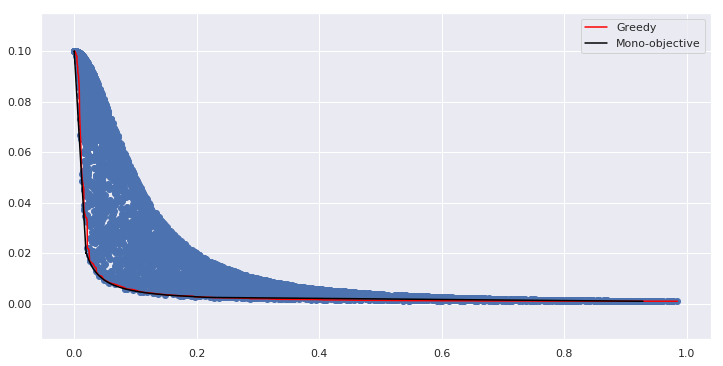

In [21]:
couples = generate(5000)
X, Y = [p(couple) for couple in couples], [d(couple) for couple in couples]
pf_X, pf_Y = pareto(X, Y)
plt.scatter(X,Y)
plt.plot(pf_X, pf_Y, c = 'red', label = 'Greedy')
plt.plot(pareto_x, pareto_y, c = 'black', label = 'Mono-objective')
plt.legend()
plt.show()

Avec 960 évaluations on a pu obtenir à peu près la même surface de Pareto qu'avec la méthode Gloutonne (5000 évaluations).

## Approvisionnement d'un chantier (optimisation combinatoire)

Nous sommes devant un problème de minimisation de flux (ici coût total des camions) que nous allons modéliser comme un problème linéaire en nombre entiers.

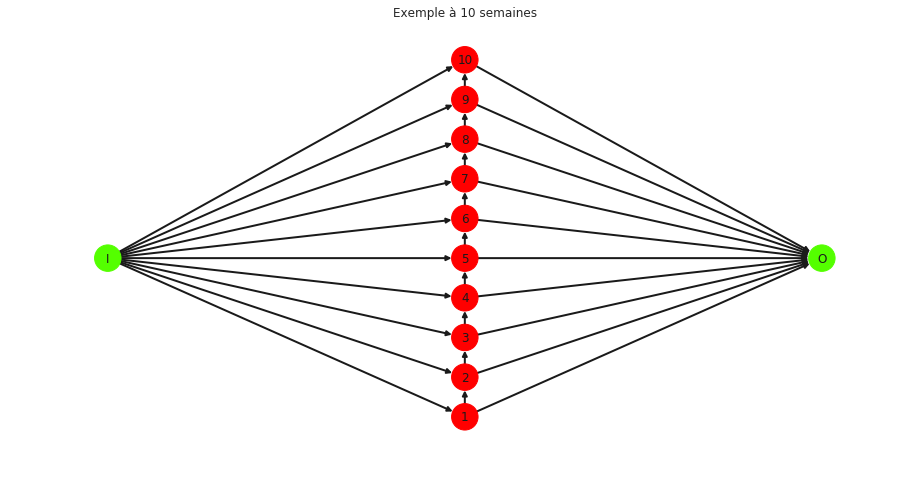

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Choosing number of weeks
N=10

edges_IN=[('I',str(i)) for i in range(1,N+1)]
edges_OUT=[(str(i),'O') for i in range(1,N+1)]
edges_weeks=[(str(i),str(i+1)) for i in range(1,N)]

pos={}
pos["I"]=np.array([-1,0])
pos["O"]=np.array([1,0])
for i in range(1,N+1):
    pos[str(i)]=np.array([0,-np.ceil(N/2)+i])

G = nx.DiGraph(directed=True)
G.add_edges_from(edges_IN+edges_OUT+edges_weeks)

val_map = {'I': 0.5714285714285714, 'O': 0.5714285714285714}
values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, pos, cmap = plt.get_cmap('prism'), node_size=700, node_color=values, width=2, with_labels=True)
plt.title("Exemple à 10 semaines")
plt.show()

Les noeuds verts du graphes représentent la société de location (I pour in et O pour out) et les noeuds rouges nos semaines numérotées de $1$ à $N$. Les arcs sont pondérés par le nombre de camions et représentent les flux de camions entre deux noeuds.

Notons $\left(E, V \right)$ notre graphe avec $E$ l'ensemble des arcs et $V$ l'ensemble des noeuds.

On définit la fonction coût à minimiser
\begin{equation}
F = \sum_{\left(u, v \right) \in E}f\left(u, v \right)
\end{equation}
où 
$$
f\left(u, v \right) =
\begin{cases}
800k_{I, v} \hspace{0.25cm}; \hspace{0.25cm} u = I \\
200k_{u, v} \hspace{0.25cm}; \hspace{0.25cm} 1 \le u, v \le N \\
1200k_{u, O} \hspace{0.25cm}; \hspace{0.25cm} v = O \\
\end{cases}
$$


$k_{u, v}$ dénote le nombre de camions qui passent du noeud $u$ au noeud $v$ pour $\left(u, v \right) \in E$

On peut donc écrire notre fonction coût:
\begin{equation}
F\left(k_{I, 1}, \ldots, k_{I, N}, k_{1, 2}, \ldots, k_{N - 1, N}, k_{1, O}, \ldots, k_{N, O} \right) = 800\sum_{1\le v \le N}k_{I, v} + 200\sum_{1 \le u \le N - 1}k_{1 \le u \le N - 1} + 1200\sum_{1 \le u \le N}k_{u, v}
\end{equation}

### Contraintes

- Nombre de véhicules nécessaires minimum par semaine:

$$\forall 1 \le v \le N : \sum_{\left(u, v \right) \in E}k_{u, v} \ge d_v \\$$
Ce qui donne:
$$
\begin{cases}
                                                  k_{I, 1}    \ge d_1 \\
\forall v \in \{2, \ldots, N\} : k_{I, v} + k_{v - 1, v} \ge d_v
\end{cases}
$$

- Conservation de flux:

$$
\begin{cases}
k_{I, 1} = k_{1, 2} + k_{1, O}\\
\forall v \in \{2, \ldots, N - 1\} k_{I, v} + k_{v - 1, v} = k_{v, v + 1} + k_{v, O}\\
k_{I, N} = k_{N - 1, N} + k_{N, O}
\end{cases}
$$

- Contrainte d'intégrité:

$$ \forall \left(u, v \right) \in E : k_{u, v} \in \mathbb{N} $$ 


In [23]:
Engins=np.genfromtxt("data/DonneesEnginsChantier.txt")

N=Engins.shape[0]

# The variable we are solving for
Ins = cvx.Variable(N, integer=True)
Outs = cvx.Variable(N, integer=True)
Weeks = cvx.Variable(N-1, integer=True)

# Defining the constraints for the problem
constraints=[]
constraints += [Ins[i] >= 0 for i in range(N)]
constraints += [Outs[i] >= 0 for i in range(N)]
constraints += [Weeks[i] >= 0 for i in range(N-1)]

for i in range(1,N):
    constraints += [Ins[i] + Weeks[i-1] >= Engins[i]]
constraints += [Ins[0] >= Engins[0]]

constraints += [Ins[0] == Weeks[0] + Outs[0]]
constraints += [Ins[N-1] + Weeks[N-2] == Outs[N-1]]
for i in range(1,N-1):
    constraints += [Ins[i] + Weeks[i-1] == Weeks[i] + Outs[i]]

# Defining the cost and objective function
Cost = 800*cvx.sum(Ins) + 1200*cvx.sum(Outs) + 200*cvx.sum(Weeks)
obj = cvx.Minimize(Cost)

# We tell cvxpy that we want to minimize cost under the constraints
Engins_problem = cvx.Problem(obj, constraints)

# Solving the problem
Engins_problem.solve()

print("Optimization status :",Engins_problem.status)
print("Cost optimized value :",Engins_problem.value)

Optimization status : optimal
Cost optimized value : 3248400.0


In [24]:
Engins_optim=np.zeros(Engins.shape[0])
Engins_optim[0]=Ins.value[0]
for i in range(1,99):
    Engins_optim[i]=Ins.value[i]+Weeks.value[i-1]

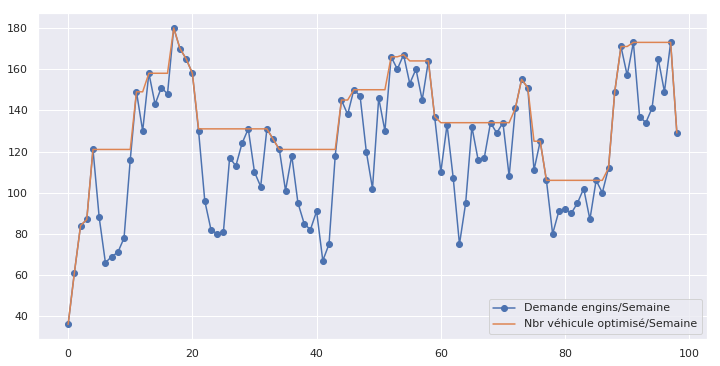

In [25]:
plt.plot(Engins,"-o",label='Demande engins/Semaine')
plt.plot(Engins_optim, label="Nbr véhicule optimisé/Semaine")
plt.legend()
plt.show()